In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
if '../..' not in sys.path:
    sys.path.append('../..')

from short_tank_EDA.exploratory_data_analysis_utils import *

In [4]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


In [5]:
idxs_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_4_class_3M_emgp0_idxs.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

In [6]:
train_angles    = angles[train_idxs]
train_energies  = energies[train_idxs]
train_positions = positions[train_idxs]
train_labels    = labels[train_idxs]

train_info = {'name':'Training Set','energies':train_energies,'positions':train_positions, 'angles':train_angles, 'labels':train_labels}

print("Done train info")

val_angles     = angles[val_idxs]
val_energies   = energies[val_idxs]
val_positions  = positions[val_idxs]
val_labels     = labels[val_idxs]

val_info = {'name':'Validation Set','energies':val_energies,'positions':val_positions, 'angles':val_angles, 'labels':val_labels}

print("Done val info")

test_angles    = angles[test_idxs]
test_energies  = energies[test_idxs]
test_positions = positions[test_idxs]
test_labels    = labels[test_idxs]
test_info = {'name':'Test Set','energies':test_energies,'positions':test_positions, 'angles':test_angles, 'labels':test_labels}

print("Done test info")

Done train info
Done val info
Done test info


In [7]:
dataset_info = [train_info, val_info, test_info]

In [8]:
mass_dict = {0:0, 1:0.511, 2:105.7, 3:134.98}

In [9]:
# Compute momenta for all events

pbar = ProgressBar(widgets=['Calculating Distance to Wall. Progress: ', Percentage(), ' ', Bar(marker='0',left='[',right=']'),
           ' ', ETA()], maxval=reduce(lambda x,y:x+y , list(map(lambda x : x['positions'].shape[0], dataset_info))))

pbar.start()
done=0
for dset in dataset_info:
    momenta = []
    for i in range(dset['positions'].shape[0]):
        pbar.update(done + i)
        momenta.append(compute_momenta(dset['energies'][i][0], mass_dict[dset['labels'][i]]))
        dset['momenta'] = momenta
    done = done + dset['positions'].shape[0]
pbar.finish()

np.savez('./prep_data/3M_momenta.npz',      train_momenta= dataset_info[0]['momenta'],
                                                     val_momenta  = dataset_info[1]['momenta'],
                                                     test_momenta = dataset_info[2]['momenta'])


Calculating Distance to Wall. Progress: 100% [000000000000000000] Time: 0:01:30


In [10]:
momenta_data = np.load('./prep_data/3M_momenta.npz', allow_pickle=True)

test_momenta = momenta_data['test_momenta']

In [15]:
print(np.max(test_momenta))

1155.4318970878812


In [11]:
print(test_energies[0:10])

[[245.00162]
 [855.76855]
 [597.02356]
 [402.78616]
 [830.34595]
 [298.88596]
 [110.14116]
 [543.9056 ]
 [632.63806]
 [286.20142]]


In [12]:
print(test_momenta[0:10])

[245.00108453 855.76840212 597.02334088 402.78583919 830.34579003
 298.88551899 110.13997366 543.90533857 632.63785515 286.20095983]


(array([267517., 459302., 541745., 542848., 542430., 542519., 544153.,
        544354., 442517., 244364.]),
 array([   1.4282632,  117.3111   ,  233.19392  ,  349.07675  ,
         464.9596   ,  580.8424   ,  696.7253   ,  812.6081   ,
         928.4909   , 1044.3738   , 1160.2566   ], dtype=float32),
 <BarContainer object of 10 artists>)

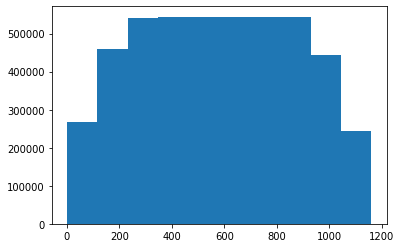

In [13]:
plt.hist(test_energies)

(array([313456., 477241., 518088., 529355., 533157., 535461., 538826.,
        539117., 448828., 238220.]),
 array([   1.33372213,  116.74353963,  232.15335713,  347.56317462,
         462.97299212,  578.38280961,  693.79262711,  809.2024446 ,
         924.6122621 , 1040.02207959, 1155.43189709]),
 <BarContainer object of 10 artists>)

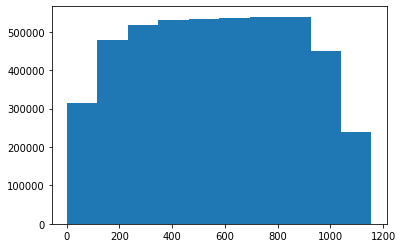

In [14]:
plt.hist(test_momenta)